Text(0.5, 1.0, 'Exponential Map , Growth Rate r = 2 ')

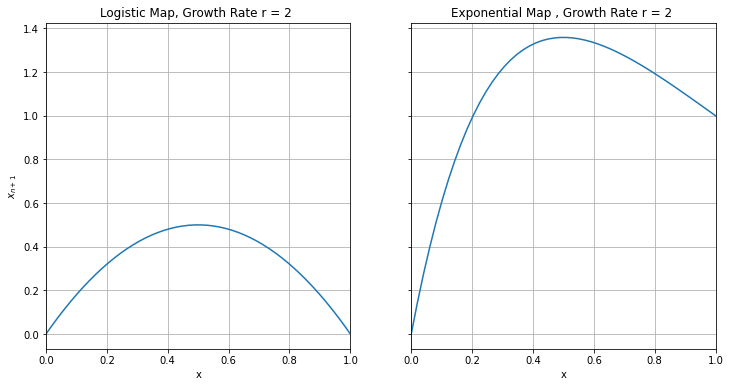

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import math

def exponential(r,x):
    return x * math.exp(r * (1-x))
    
def logistic(r,x):
    return (r * x * (1-x))
        
log = np.vectorize(logistic)
exp = np.vectorize(exponential)

x = np.linspace(0, 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax1.grid()
ax1.set_xlim(0, 1)
ax1.plot(x, log(2,x))
ax1.set_title("Logistic Map, Growth Rate r = 2 ")
ax1.set_ylabel(r"$x_{n+1}$")
ax1.set_xlabel("x")

ax2.grid()
ax2.set_xlim(0, 1)
ax2.plot(x, exp(2,x))
ax2.set_xlabel("x")
ax2.set_title("Exponential Map , Growth Rate r = 2 ")

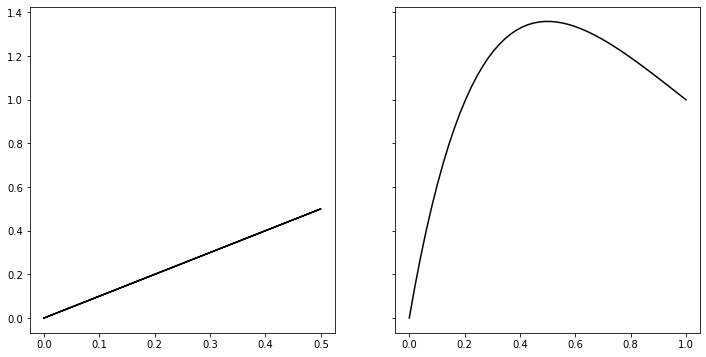

In [77]:
def twoDlogistic(r,x,y, d):
    return d * logistic(r,x) + (1-d)*logistic(r,y), (1-d)*logistic(r,x)+ d*logistic(r,y)

def twoDexponential(r,x,y,d):
    return d * exponential(r,x) + (1-d)*exponential(r,y), (1-d)*exponential(r,x)+d*exponential(r,y)


x = np.linspace(0, 1)
y = np.linspace(0, 1)
d = 0.5 + 0.48

log2D = np.vectorize(twoDlogistic)
exp2D = np.vectorize(twoDexponential)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

ax1.plot(log2D(2,x,y,d)[0], log2D(2,x,y,d)[1], 'k')
ax2.plot(y , exp2D(2,x,y,d)[1], 'k')

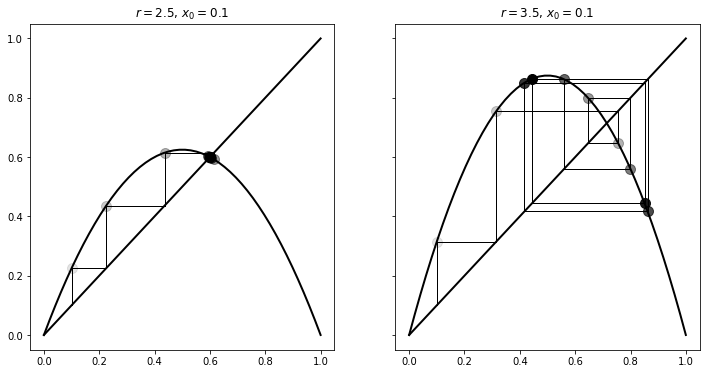

In [25]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, log(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = log(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    #ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

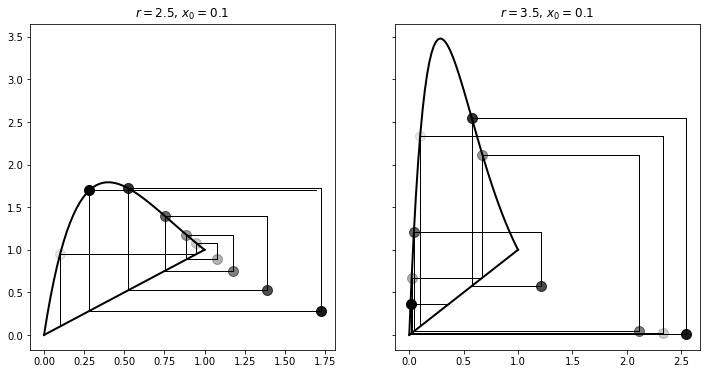

In [87]:
def plot_system(r, x0, n, ax=None):
    # Plot the function and the
    # y=x diagonal line.
    t = np.linspace(0, 1)
    ax.plot(t, exp(r, t), 'k', lw=2)
    ax.plot([0, 1], [0, 1], 'k', lw=2)

    # Recursively apply y=f(x) and plot two lines:
    # (x, x) -> (x, y)
    # (x, y) -> (y, y)
    x = x0
    for i in range(n):
        y = exp(r, x)
        # Plot the two lines.
        ax.plot([x, x], [x, y], 'k', lw=1)
        ax.plot([x, y], [y, y], 'k', lw=1)
        # Plot the positions with increasing
        # opacity.
        ax.plot([x], [y], 'ok', ms=10,
                alpha=(i + 1) / n)
        x = y

    #ax.set_xlim(0, 1)
    #ax.set_ylim(0, 1)
    ax.set_title(f"$r={r:.1f}, \, x_0={x0:.1f}$")


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
plot_system(2.5, .1, 10, ax=ax1)
plot_system(3.5, .1, 10, ax=ax2)

/home/izzza/.local/lib/python3.8/site-packages/numpy/lib/function_base.py:2246: RuntimeWarning: overflow encountered in logistic (vectorized)
  outputs = ufunc(*inputs)
/tmp/ipykernel_24063/3924553639.py:15: RuntimeWarning: overflow encountered in multiply
  lyapunov += np.log(abs(r - 2 * r * x))


Text(0.5, 1.0, 'Lyapunov exponent')

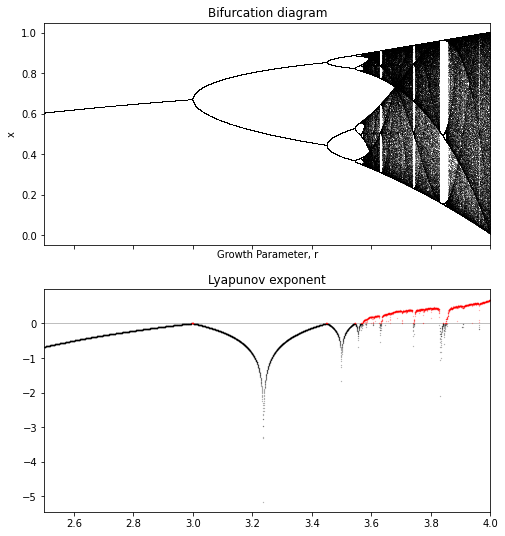

In [79]:
n = 10000
r = np.linspace(2.5, 5.0, n)

iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)
one = np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)
for i in range(iterations):
    x = log(r, x)
    lyapunov += np.log(abs(r - 2 * r * x))
    #lyapunov += np.log(abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
 
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlabel('Growth Parameter, r')
ax1.set_ylabel('x')       
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

ax2.axhline(0, color='k', lw=.5, alpha=.5)

ax2.plot(r[lyapunov < 0],lyapunov[lyapunov < 0] / iterations,'.k', alpha=.5, ms=.5)

ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations,'.r', alpha=.5, ms=.5)

ax2.set_xlim(2.5, 4)
ax2.set_title("Lyapunov exponent")


Text(0.5, 1.0, 'Lyapunov exponent')

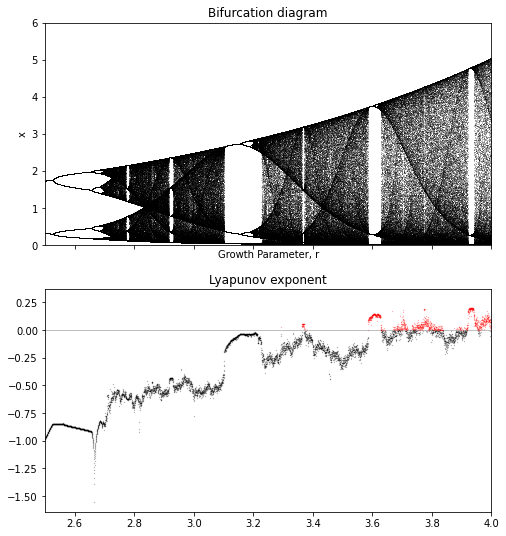

In [73]:
iterations = 1000
last = 100

x = 1e-5 * np.ones(n)

lyapunov = np.zeros(n)
one      = np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9), sharex=True)

for i in range(iterations):
    x = exp(r, x)
    
    #lyapunov += np.log(abs(r - 2 * r * x))
    lyapunov += np.log(abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
    
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
        
ax1.set_xlabel('Growth Parameter, r')
ax1.set_ylabel('x') 
ax1.set_ylim(0,6)
ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")

ax2.axhline(0, color='k', lw=.5, alpha=.5)

ax2.plot(r[lyapunov < 0], lyapunov[lyapunov < 0] / iterations,'.k', alpha=.5, ms=.5)

ax2.plot(r[lyapunov >= 0], lyapunov[lyapunov >= 0] / iterations, '.r', alpha=.5, ms=.5)

ax2.set_title("Lyapunov exponent")

Text(0.5, 1.0, 'Bifurcation diagram')

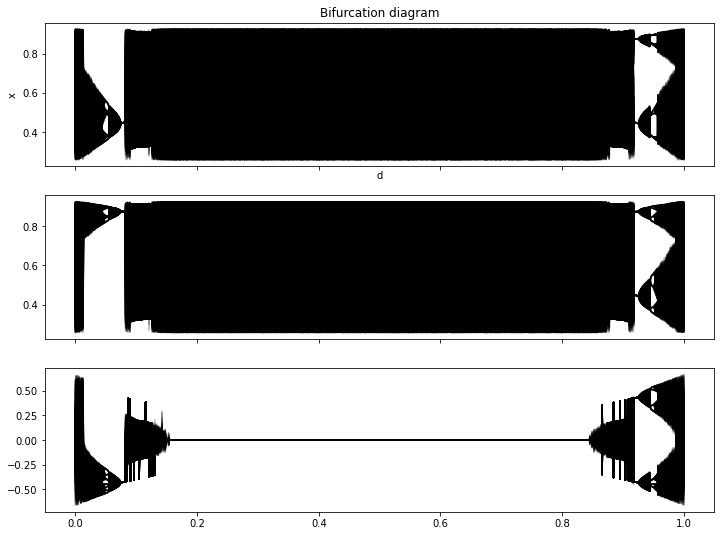

In [89]:
n = 3000
iterations = 1000
last = 100
x = 1e-5 * np.ones(n)
y = 5e-5 * np.ones(n)
lyapunov = np.zeros(n)

#one = np.ones(n)

d = np.linspace(0, 1, n)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 9),
                               sharex=True)
r = 3.7 * np.ones(n)

#l2D = log2D(r, x, y , d)
#ax1.plot(d, l2D[0], ',k', alpha=.25)
#ax2.plot(d, l2D[1], 'k', alpha = 0.25)
    
for i in range(iterations):
    x, y = log2D(r, x, y , d)
    #ax1.plot(d, x, 'k', alpha=.25)
    #ax2.plot(d, y, 'k', alpha = 0.25)
    
    # We compute the partial sum of the
    # Lyapunov exponent.
    
    #lyapunov += np.log(abs(r - 2 * r * x))
    
    #lyapunov += np.log(abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
    
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(d, x, 'k', alpha=.25)
        ax2.plot(d, y, 'k', alpha = 0.25)
        ax3.plot(d, x-y, 'k', alpha = 0.25)
        
ax1.set_xlabel('d')
ax1.set_ylabel('x')       
#ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")



In [ ]:
# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)

# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)

ax2.set_xlim(2.5, 4)
#ax2.set_ylim(-2, 1)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()


Text(0.5, 1.0, 'Bifurcation diagram')

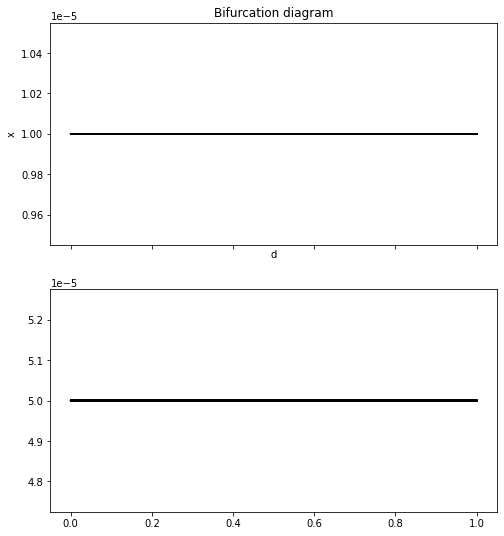

In [70]:
iterations = 1000
last = 100

x = 1e-5 * np.ones(n)
y = 5e-5 * np.ones(n)

x0 = 0.1
y0 = 0.75

lyapunov = np.zeros(n)
one = np.ones(n)

d = np.linspace(0, 1, n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
r = 4 * np.ones(n)

#l2D = log2D(r, x, y , d)
#ax1.plot(d, l2D[0], ',k', alpha=.25)
#ax2.plot(d, l2D[1], 'k', alpha = 0.25)
        
d1 = 0.5 - 0.484
d2 = 0.5 + 0.484 

for i in range(iterations):
    x1, y1 = log2D(r, x0, y0 , d1)
    x2, y2 = log2D(r, x0, y0 , d2)
    
    # We compute the partial sum of the
    # Lyapunov exponent.
    
    #lyapunov += np.log(abs(r - 2 * r * x))
    
    #lyapunov += np.log(abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
    
    
    #ax1.plot(d, x, 'k', alpha=.25)
    #ax2.plot(d, y, 'k', alpha = 0.25)
        
    
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(d, x, 'k', alpha=.25)
        ax2.plot(d, y, 'k', alpha = 0.25)
        #ax3.plot(d, x-y, 'k', alpha = 0.25)
        
ax1.set_xlabel('d')
ax1.set_ylabel('x')       
#ax1.set_xlim(2.5, 4)
ax1.set_title("Bifurcation diagram")



Text(0.5, 1.0, 'Seven Zone Dynamics for a Coupled Exponential Map with r = 3.7 , ($x_0,y_0$) = (0.1, 0.75)')

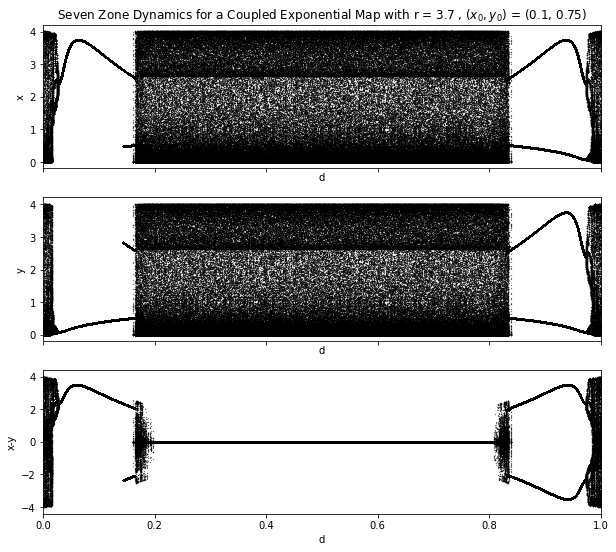

In [60]:
n = 5000
iterations = 1000
last = 100

x = 0.1 * np.ones(n)
y = 0.75 * np.ones(n)

lyapunov = np.zeros(n)

d = np.linspace(0, 1, n)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 9), sharex=True)

r = 3.7 * np.ones(n)
    
for i in range(iterations):
    #x, y = exp2D(r, x, y , d)
    x, y = log2D(r, x, y , d)

    if i >= (iterations - last):
        ax1.scatter(d, x,  s = 0.05, facecolor = 'black')
        ax2.scatter(d, y,  s = 0.05, facecolor = 'black')
        ax3.scatter(d, x-y,  s = 0.05, facecolor = 'black')

ax1.set_xlabel('d')
ax1.set_xlim(0,1)
ax1.set_ylabel('x')

ax2.set_xlabel('d')
ax2.set_xlim(0,1)
ax2.set_ylabel('y')

ax3.set_xlabel('d')
ax3.set_xlim(0,1)
ax3.set_ylabel('x-y')

ax1.set_title(r"Seven Zone Dynamics for a Coupled Exponential Map with r = 3.7 , ($x_0,y_0$) = (0.1, 0.75)")


In [26]:
def plot(title1, title2, xlabel1, ylabel, xlabel2, xlim, ylim):
    ax1.set_title(title1)
    ax2.set_title(title2)
    ax1.grid()
    ax2.grid()
    ax1.set_xlabel(xlabel1)
    ax1.set_ylabel(ylabel)       
    ax2.set_xlabel(xlabel2)
    ax1.set_ylim(xlim[0],xlim[1])
    ax2.set_ylim(ylim[0], ylim[1])
    ax1.set_xlim(xlim[0],xlim[1])
    ax2.set_xlim(ylim[0], ylim[1])

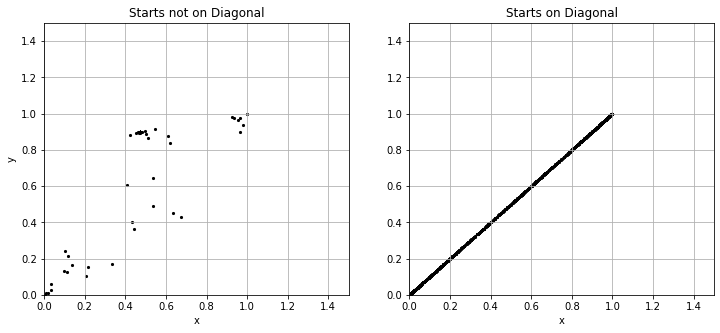

In [81]:
iterations = 1000
last = 100

# Starts not on the Diagonal
x1 = 1e-5
y1 = 5e-5

# Starts on the Diagonal
x2 = 1e-5
y2 = 1e-5

d1 = 0.16
d2 = 0.21

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

r = 4

x1_data_plot=[]
y1_data_plot=[]

x2_data_plot=[]
y2_data_plot=[]

for i in range(iterations):
    
    x1_data_plot.append(x1)
    y1_data_plot.append(y1)
    
    x2_data_plot.append(x2)
    y2_data_plot.append(y2)
    
    #x1, y1 = twoDexponential(r, x1, y1 , d1)
    x1, y1 = twoDlogistic(r, x1, y1 , d1)
    #x2, y2 = twoDexponential(r, x2, y2 , d2)
    x2, y2 = twoDlogistic(r, x2, y2 , d2)

ax1.scatter(x1_data_plot, y1_data_plot, s = 4.5, facecolor ='black')
ax2.scatter(x2_data_plot, y2_data_plot, s = 4.5, facecolor ='black')

plot("Starts not on Diagonal", "Starts on Diagonal","x", "y", "x", [0,1.5], [0,1.5])

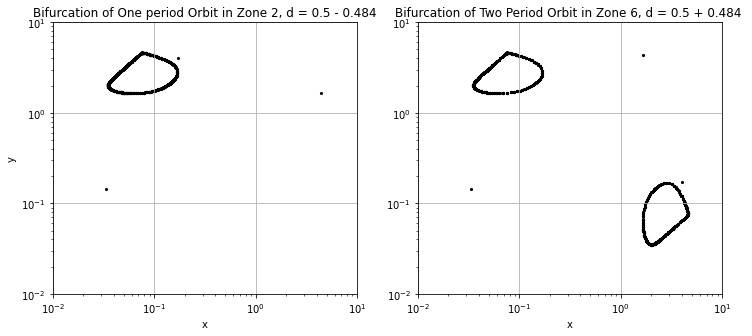

In [37]:
iterations = 1000
last = 100

x1 = 1e-5
y1 = 5e-5

x2 = 1e-5
y2 = 5e-5

d1 = 0.5 - 0.484
d2 = 0.5 + 0.484

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)
r = 4

x1_data_plot=[]
y1_data_plot=[]

x2_data_plot=[]
y2_data_plot=[]

for i in range(iterations):
    
    x1_data_plot.append(x1)
    y1_data_plot.append(y1)
    
    x2_data_plot.append(x2)
    y2_data_plot.append(y2)
    
    x1, y1 = twoDexponential(r, x1, y1 , d1)
    x2, y2 = twoDexponential(r, x2, y2 , d2)
    
ax1.scatter(x1_data_plot, y1_data_plot, s = 4.5, facecolor ='black')
ax2.scatter(x2_data_plot, y2_data_plot, s = 4.5, facecolor ='black')

plot("Bifurcation of One period Orbit in Zone 2, d = 0.5 - 0.484" , "Bifurcation of Two Period Orbit in Zone 6, d = 0.5 + 0.484 ", "x", "y", "x",[1e-2, 1e1],[1e-2, 1e1] )
      
ax1.set_yscale('log')
ax1.set_xscale('log')
ax2.set_yscale('log')
ax2.set_xscale('log')

In [ ]:
n = 10000
iterations = 1000
last = 100

x1 = 1e-5
y1 = 5e-5

x2 = 1e-5
y2 = 1e-5

lyapunov1 = np.zeros(n)
lyapunov2 = np.zeros(n)

d = np.linspace(0,1,n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),
                               sharex=True)
r = 4 * np.ones(n)

x1_data_plot=[]
y1_data_plot=[]

x2_data_plot=[]
y2_data_plot=[]

for i in range(iterations):
    
    x, y = log2D(r, x, y , d)
   
    # We compute the partial sum of the
    # Lyapunov exponent.
    
    lyapunov1 += np.log(abs(d*(r - 2 * r * x)))
    lyapunov2 += np.log(abs(d*(r - 2 * r * y)))
    
    #lyapunov += np.log(d * abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one )))
    #lyapunov += np.log(d * abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one )))
    
    #ax1.plot(d, x, 'k', alpha=.25)
    #ax2.plot(d, y, 'k', alpha = 0.25)
        
    
    # We display the bifurcation diagram.
    #if i >= (iterations - last):
        #ax1.plot(x1, y1, 'k', alpha=.25)
        #ax2.plot(x2, y2, 'k', alpha = 0.25)
        #ax3.plot(d, x-y, 'k', alpha = 0.25)

ax1.scatter(x1_data_plot, y1_data_plot, s = 4.5, facecolor ='black')
ax2.scatter(x2_data_plot, y2_data_plot, s = 4.5, facecolor ='black')
ax1.set_xlabel('x')
ax1.set_ylabel('y')       
#ax1.set_xlim(2.5, 4)


/tmp/ipykernel_13855/2524924123.py:33: RuntimeWarning: divide by zero encountered in log
  lyapunov1 += np.log(d * abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
/tmp/ipykernel_13855/2524924123.py:34: RuntimeWarning: divide by zero encountered in log
  lyapunov2 += np.log(d * abs(np.exp(r * (one-y)) * (r * y * (x-one)/(np.exp(1)*one)) + one ))


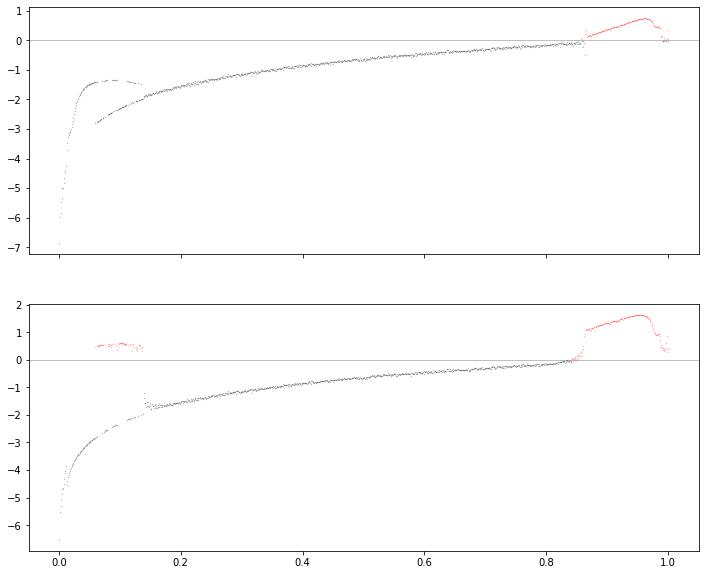

In [127]:
n = 1000

iterations = 1000
last = 100

one = np.ones(n)

x = 1e-5 * np.ones(n)
y = 5e-5 * np.ones(n)

lyapunov1 = np.zeros(n)
lyapunov2 = np.zeros(n)

d = np.linspace(0,1,n)

r = 4 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10),
                               sharex=True)


for i in range(iterations):
    
    x, y = exp2D(r, x, y , d)
    
    
    # We compute the partial sum of the
    # Lyapunov exponent.
    
    #lyapunov1 += np.log(abs(d*(r - 2 * r * x)))
    #lyapunov2 += np.log(abs(d*(r - 2 * r * x)))
    
    lyapunov1 += np.log(d * abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
    lyapunov2 += np.log(d * abs(np.exp(r * (one-y)) * (r * y * (x-one)/(np.exp(1)*one)) + one ))
    
    #ax1.plot(d, x, 'k', alpha=.25)
    #ax2.plot(d, y, 'k', alpha = 0.25)
        
    
    # We display the bifurcation diagram.
    #if i >= (iterations - last):
        #ax1.plot(x1, y1, 'k', alpha=.25)
        #ax2.plot(x2, y2, 'k', alpha = 0.25)
        #ax3.plot(d, x-y, 'k', alpha = 0.25)
        

# We display the Lyapunov exponent.
# Horizontal line.
ax1.axhline(0, color='k', lw=.5, alpha=.5)
ax2.axhline(0, color='k', lw=.5, alpha=.5)

# Negative Lyapunov exponent.
ax1.plot(d[lyapunov1 < 0],
         lyapunov1[lyapunov1 < 0] / iterations,
         '.k', alpha=.5, ms=.5)

ax2.plot(d[lyapunov2 < 0],
         lyapunov2[lyapunov2 < 0] / iterations,
         '.k', alpha=.5, ms=.5)

# Positive Lyapunov exponent.
ax1.plot(d[lyapunov1 >= 0],
         lyapunov1[lyapunov1 >= 0] / iterations,
         '.r', alpha=.5, ms=.5)

ax2.plot(d[lyapunov2 >= 0],
         lyapunov2[lyapunov2 >= 0] / iterations,
         '.r', alpha=.5, ms=.5)


#ax1.scatter(x1_data_plot, y1_data_plot, s = 4.5, facecolor ='black')
#ax2.scatter(x2_data_plot, y2_data_plot, s = 4.5, facecolor ='black')
#ax1.set_xlabel('x')
#ax1.set_ylabel('y')       
#ax1.set_xlim(2.5, 4)


In [ ]:
    
    # We compute the partial sum of the
    # Lyapunov exponent.
    
    #lyapunov += np.log(abs(r - 2 * r * x))
    
    #lyapunov += np.log(abs(np.exp(r * (one-x)) * (r * x * (x-one)/(np.exp(1)*one)) + one ))
    
    
    #ax1.plot(d, x, 'k', alpha=.25)
    #ax2.plot(d, y, 'k', alpha = 0.25)
        
    
    # We display the bifurcation diagram.
    #if i >= (iterations - last):
        #ax1.plot(x1, y1, 'k', alpha=.25)
        #ax2.plot(x2, y2, 'k', alpha = 0.25)
        #ax3.plot(d, x-y, 'k', alpha = 0.25)